In [21]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import datetime
import seaborn as sns; 
sns.set(color_codes=True)

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/COVID-19%20in%20India/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [24]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [25]:
ex = np.unique(df['State/UnionTerritory'])
ex

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Bihar****',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Himanchal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karanataka', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Madhya Pradesh***', 'Maharashtra',
       'Maharashtra***', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [26]:
def clean_stateName(stateName):
    if stateName == 'Telangana':
        stateName = 'Telangana'
    elif stateName == 'Telengana':
        stateName = 'Telangana'  
    elif stateName == 'Bihar****':
        stateName = 'Bihar'
    elif stateName == 'Himanchal Pradesh':
        stateName = 'Himachal Pradesh'
    elif stateName == 'Karanataka':
        stateName = 'Karnataka'
    elif stateName == 'Madhya Pradesh***':
        stateName = 'Madhya Pradesh'
    elif stateName == 'Maharashtra***':
        stateName = 'Maharashtra'
    return stateName

In [27]:
df["State/UnionTerritory"] = df["State/UnionTerritory"].apply(lambda x: clean_stateName(x))
np.unique(df["State/UnionTerritory"]) 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Unassigned', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [29]:
def daily_cases(dframe, stateColumn,dateColumn, cummColumn):
    dframe.sort_values(by = [stateColumn, dateColumn], inplace = True)
    newColName = 'daily_' + cummColumn
    dframe[newColName] = dframe[cummColumn].diff() 
    '''
    Below line uses shift method of pandas to compare consecutive state names and if they are not different
    as shown by using ! symbol then create list of boolean, True for if they are different else False
    ''' 
    mask = dframe[stateColumn] != dframe[stateColumn].shift(1)
    dframe[newColName][mask] = np.nan 
    dframe[newColName] = dframe[newColName].apply(lambda x: 0 if x < 0 else x)
    
    return dframe
    
df_new = daily_cases(dframe= df, stateColumn= 'State/UnionTerritory',dateColumn= 'Date', cummColumn= 'Confirmed')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [30]:
df_new[507:507]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed


In [31]:
df_new[df_new["State/UnionTerritory"]=="Maharashtra"].tail(n=5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed
17950,17951,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759,5539.0
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820,6061.0
18022,18023,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328,5508.0
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833,4505.0
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442,5609.0


In [32]:
df_group = df_new.groupby(['State/UnionTerritory'])['daily_Confirmed'].mean()
df_group = df_group.sort_values(ascending= False)[0:10]
df_group

State/UnionTerritory
Maharashtra       12237.398077
Kerala             6416.264758
Karnataka          5640.344231
Tamil Nadu         4940.860153
Andhra Pradesh     3839.808511
Uttar Pradesh      3265.908571
West Bengal        3003.909980
Delhi              2746.764706
Chhattisgarh       1967.362745
Odisha             1927.867446
Name: daily_Confirmed, dtype: float64

In [33]:
df_group.index

Index(['Maharashtra', 'Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh',
       'Uttar Pradesh', 'West Bengal', 'Delhi', 'Chhattisgarh', 'Odisha'],
      dtype='object', name='State/UnionTerritory')

Text(0, 0.5, 'Mean of Daily Confirmed Cases')

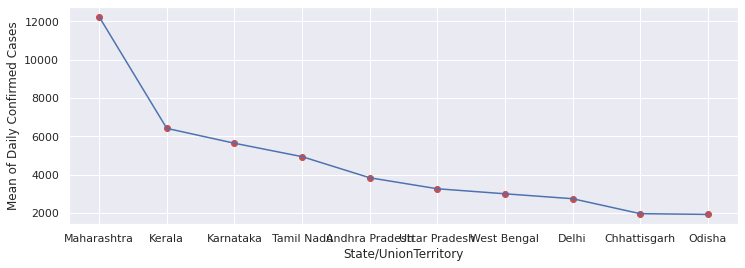

In [34]:
ax = sns.lineplot(x= df_group.index , y= df_group.values) # df_group.values - extract only the values of a column
plt.scatter(x= df_group.index, y= df_group.values, c = 'r')
ax.figure.set_figwidth(12)
ax.figure.set_figheight(4)
ax.set_ylabel("Mean of Daily Confirmed Cases")

In [35]:
df_months = df_new['Date'].apply(lambda x: x.month in [6,7,8]) 

In [37]:
df_final = df_new[df_months]
df_final.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed
17965,17966,2021-08-07,8:00 AM,West Bengal,-,-,1503535,18202,1532379,717.0
18001,18002,2021-08-08,8:00 AM,West Bengal,-,-,1504326,18217,1533128,749.0
18037,18038,2021-08-09,8:00 AM,West Bengal,-,-,1505089,18229,1533803,675.0
18073,18074,2021-08-10,8:00 AM,West Bengal,-,-,1505808,18240,1534360,557.0
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,639.0


In [38]:
df_final['death_rate'] = df_final['Deaths'] / df_final['Confirmed'] *100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_final.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed,death_rate
17965,17966,2021-08-07,8:00 AM,West Bengal,-,-,1503535,18202,1532379,717.0,1.187826
18001,18002,2021-08-08,8:00 AM,West Bengal,-,-,1504326,18217,1533128,749.0,1.188224
18037,18038,2021-08-09,8:00 AM,West Bengal,-,-,1505089,18229,1533803,675.0,1.188484
18073,18074,2021-08-10,8:00 AM,West Bengal,-,-,1505808,18240,1534360,557.0,1.188769
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,639.0,1.189056


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

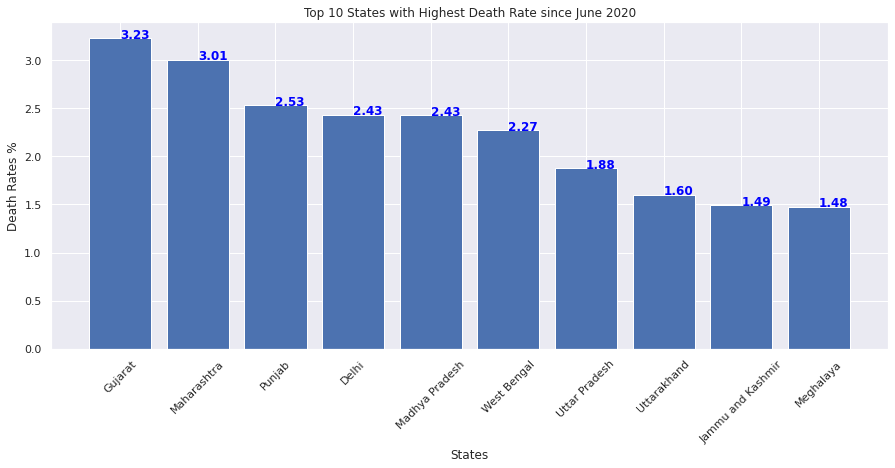

In [40]:
df_groups_deaths = df_final.groupby(["State/UnionTerritory"])['death_rate'].mean()
top_10_deathrates = df_groups_deaths.sort_values(ascending= False)[0:10]
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.bar(x = top_10_deathrates.index, height =  top_10_deathrates.values)
ax.set_xlabel('States')
ax.set_ylabel('Death Rates %')
ax.set_title('Top 10 States with Highest Death Rate since June 2020')
for i, v in enumerate(top_10_deathrates.values):
    ax.text(i, v, s = ("%.2f" % v), color='blue', fontweight='bold', fontsize = 12) 
plt.xticks(rotation=45) 

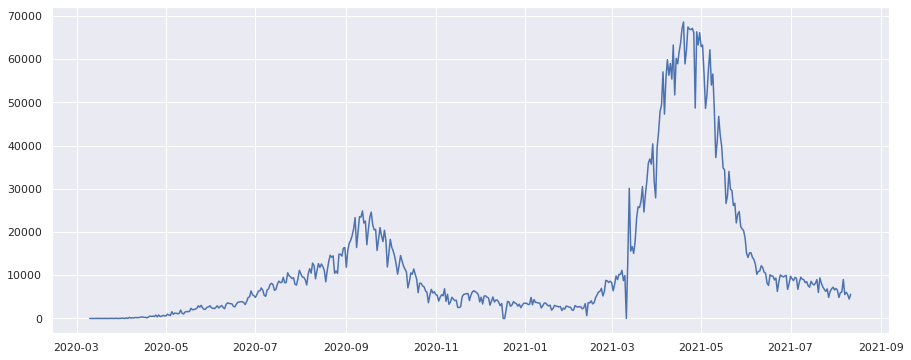

In [41]:
df_Maharashtra = df_new[df_new["State/UnionTerritory"]=='Maharashtra']
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.plot(df_Maharashtra["Date"],df_Maharashtra["daily_Confirmed"])

Text(0.5, 1.0, 'Death Rate in Maharastra')

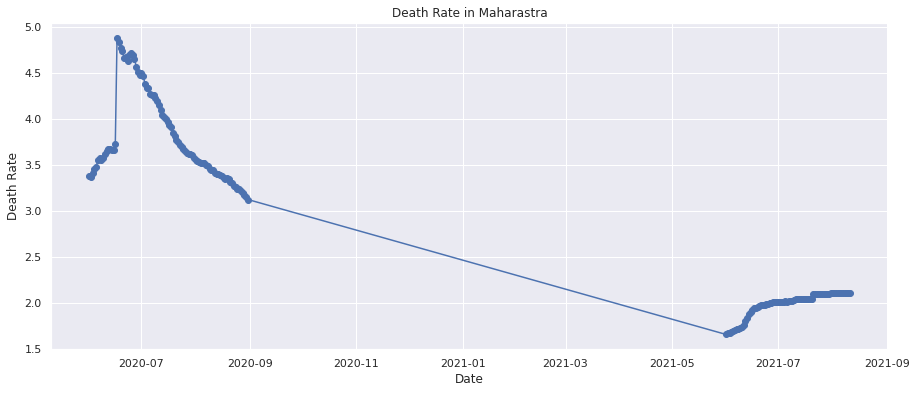

In [42]:
df_Maharashtra = df_final[df_final["State/UnionTerritory"]=='Maharashtra']
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.plot(df_Maharashtra["Date"],df_Maharashtra["death_rate"])
ax.scatter(df_Maharashtra["Date"],df_Maharashtra["death_rate"])
ax.set_xlabel('Date')
ax.set_ylabel('Death Rate')
ax.set_title('Death Rate in Maharastra')